# COSYNE 2022 Submission Figures

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import pandas as pd
from importlib import reload

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns


import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Utils.robust_stats as rs

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [61]:
ei = reload(ei)
info = ei.SummaryInfo()

In [3]:
seg_rates = info.get_bal_conds_seg_rates()
zrc = info.get_zone_rates_remap()
remap_measures = zrc.columns[10:]
id_vars = ['unit_id', 'subject', 'session', 'session_unit_id', 'unit_type']
test_vars = [metric for metric in remap_measures if (('corr' in metric) & (len(metric.split('-'))<=3))]
null_vars = [metric for metric in remap_measures if (('Even' in metric) & ('corr' in metric) & (len(metric.split('-'))<=3)) ]
z_vars = [metric for metric in remap_measures if (('z' in metric) & (len(metric.split('-'))>3))]

In [4]:
zrc[(zrc.unit_type=='cell')].groupby('session').mean().sort_values(z_vars[0])[z_vars[0]]

session
Cl_T3g_020719   -3.641395
Cl_T3g_012919   -3.047326
Li_T3g_070918   -2.318474
Li_T3g_062818   -2.315694
Cl_T3g_012419   -2.251915
                   ...   
Cl_T3i_021519    0.587064
Al_T3g_111418    0.873697
NE_T3g_052818    1.085662
NE_T3g_072518    1.698293
Ca_T3g_030419         NaN
Name: CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm, Length: 103, dtype: float64

In [40]:
zrc.loc[ [10, 20, 40, 50]].session

10    Li_T3g_052918
20    Li_T3g_053018
40    Li_T3g_053118
50    Li_T3g_060118
Name: session, dtype: object

In [34]:
info.unit_table

,subject_cl_id,subject,session,task,date,subsession,tt,depth,unique_cl_name,session_cl_id,...,subject_cl_match_lib_id,snr,fr,isi_viol_rate,cl_id,cl_match_con_id,cl_match_lib_id,task2,match_lib_multi_task_id,match_con_multi_task_id
0,0,Li,Li_T3g_052818,T3g,52818,0,2,16.500,Li_T3g_052818-tt2_d16.5_cl11,11,...,NaN,NaN,2.84,0.20,0,NaN,NaN,T3,-1,-1
1,1,Li,Li_T3g_052818,T3g,52818,0,2,16.500,Li_T3g_052818-tt2_d16.5_cl14,14,...,NaN,NaN,2.69,0.05,1,NaN,NaN,T3,-1,-1
2,2,Li,Li_OF_052818,OF,52818,0,7,17.250,Li_OF_052818-tt7_d17.25_cl8,8,...,39.0,5.09,13.56,1.13,2,43.0,39.0,OF,-1,-1
3,3,Li,Li_OF_052818,OF,52818,0,8,16.250,Li_OF_052818-tt8_d16.25_cl4,4,...,44.0,10.08,2.95,0.44,3,48.0,44.0,OF,-1,-1
4,4,Li,Li_OF_052818,OF,52818,0,8,16.250,Li_OF_052818-tt8_d16.25_cl18,18,...,52.0,6.60,33.03,0.54,4,50.0,52.0,OF,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,73,Mi,Mi_OF_021220,OF,21220,0,12,16.125,Mi_OF_021220-tt12_d16.125_cl20,20,...,8.0,8.11,25.24,0.11,4459,964.0,858.0,OF,-1,-1
4460,74,Mi,Mi_OF_021220,OF,21220,0,12,16.125,Mi_OF_021220-tt12_d16.125_cl10,10,...,NaN,6.75,8.17,0.51,4460,NaN,NaN,OF,-1,-1
4461,75,Mi,Mi_OF_021720,OF,21720,0,14,16.375,Mi_OF_021720-tt14_d16.375_cl1,1,...,11.0,12.38,4.92,0.00,4461,967.0,861.0,OF,-1,-1
4462,76,Mi,Mi_OF_021720,OF,21720,0,14,16.375,Mi_OF_021720-tt14_d16.375_cl0,0,...,NaN,20.18,0.42,0.00,4462,NaN,NaN,OF,-1,-1


Select Session

In [62]:
subject_widget = widgets.Dropdown(options=info.subjects)
session_widget = widgets.Dropdown(options=info.sessions_by_subject[subject_widget.value])
task_widget = widgets.Dropdown(options=['T3', 'OF'])

def update_sessions(*args):
    all_sessions = info.sessions_by_subject[subject_widget.value]
    task_sessions = [session for session in all_sessions if task_widget.value in session]
    session_widget.options = task_sessions

def get_session(subject, task, session):
    return ei.SubjectSessionInfo(subject, session)

subject_widget.observe(update_sessions, names='value')
task_widget.observe(update_sessions, names='value')
o=widgets.interactive(get_session, subject=subject_widget, task=task_widget, session=session_widget)
display(o)


interactive(children=(Dropdown(description='subject', options=('Li', 'Ne', 'Cl', 'Al', 'Ca', 'Mi'), value='Li'…

In [63]:
session = session_widget.value
session_info = o.result
print(session_info)


Session Information for subject Li, session Li_T3g_052818
Number of curated units: 2
Methods listed below can be executed with get_{method}(), eg. get_spikes():
  -> track_data. Executed = True
  -> spikes. Executed = True
  -> binned_spikes. Executed = True
  -> fr. Executed = True
  -> pos_zones. Executed = True
  -> event_table. Executed = True
  -> trial_zone_rates. Executed = False
  -> zone_rates_comps. Executed = True
  -> zone_rates_remap. Executed = True
  -> pop_zone_rates_remap. Executed = True
  -> bal_conds_seg_rates. Executed = True
  -> bal_conds_seg_boot_rates. Executed = nan

To run all analyses use run_analyses().



In [64]:
session_info.get_bal_conds_seg_boot_rates()

,boot,cond,unit,seg,m
0,0,CR_bo,0,H,2.171702
1,0,CR_bo,1,H,1.890922
2,0,CR_bo,0,a_0,2.150173
3,0,CR_bo,1,a_0,2.386878
4,0,CR_bo,0,a_1,0.780477
...,...,...,...,...,...
38995,49,Odd_bi,1,g_1,2.104426
38996,49,Odd_bi,0,g_2,3.828176
38997,49,Odd_bi,1,g_2,1.365518
38998,49,Odd_bi,0,G4,4.152447


In [9]:
%%time
tmf = reload(tmf)
tmz = tmf.TreeMazeZones()

CPU times: user 25.4 s, sys: 495 ms, total: 25.9 s
Wall time: 4.08 s


Balanced condition set

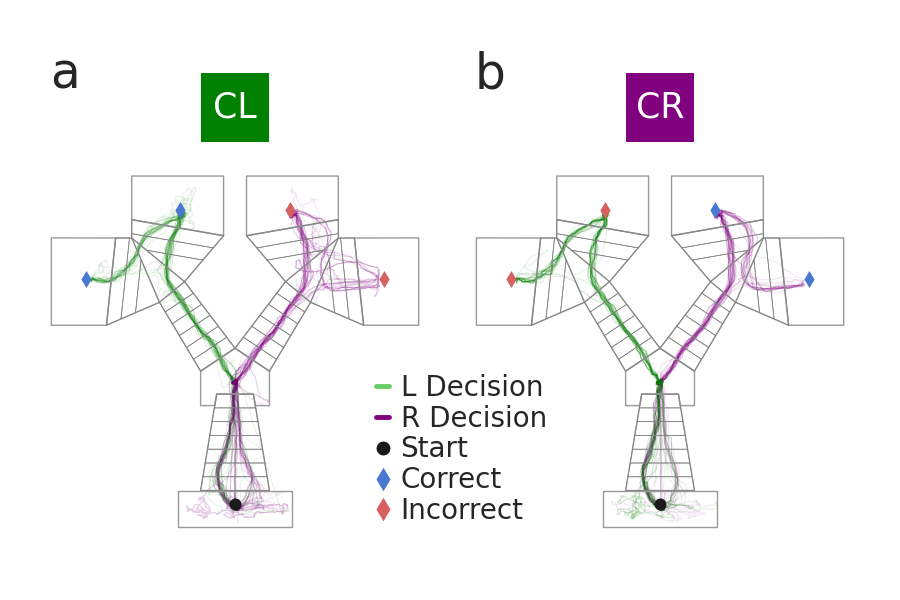

In [31]:
ta = tmf.TrialAnalyses(session_info, trial_end='tE_2', reward_blank=True)
def plot_balanced_track_behav(boot_num, ax=None):
    maze_params = dict(fontsize=5, lw=0.2, line_color='0.6',sub_segs='all',  sub_seg_color='None', sub_seg_lw=0.1)
    leg_params = dict(fontsize=4, lw=0.7, markersize=1)
    trajectories_params = dict(lw= 0.15, alpha=0.1)
    well_marker_size=3
    if ax is None:
        f,ax = plt.subplots(1,2, figsize=(2,1), dpi=500)
        ax[0].set_position([0,0,0.55,1])
        ax[1].set_position([0.45,0,0.5,1])
    else:
        raise NotImplementedError
        f = ax.figure
    x,y = ta.get_trial_track_pos()
    
    _ = ta.tmz.plot_maze(axis=ax[0],
                                seg_color=None, zone_labels=False, seg_alpha=0.1,
                                plot_cue=True, cue_color='L', **maze_params)
    _ = ta.tmz.plot_maze(axis=ax[1],
                                seg_color=None, zone_labels=False, seg_alpha=0.1,
                                plot_cue=True, cue_color='R', **maze_params)
    
    
    well_coords = ta.tmz.well_coords
    correct_cue_goals = {'CR':['G1','G2'], 'CL':['G3', 'G4']}
    cue_coords = ta.tmz.cue_label_coords
    for ii, cue in enumerate(['CL', 'CR']):
        for tr in cue_trial_sets[cue][:,boot_num]:
            dec = ta.trial_table.loc[tr, 'dec']
            valid_dur = ta.trial_table.loc[tr, 'dur'] <= 1000
            if (dec in ['L','R']) & valid_dur:
                col = ta.tmz.split_colors[dec]
                ax[ii].plot(x[tr], y[tr], zorder=1, color=col, **trajectories_params)
                
        ax[ii].scatter(well_coords['H'][0], well_coords['H'][1], s=well_marker_size, marker='o', lw=0, color='k', zorder=10)
            
        for jj in range(4):
            goal_id = f"G{jj+1}"
            coords = well_coords[goal_id]
            marker_end_color = 'b' if (goal_id in correct_cue_goals[cue])  else 'r'

            ax[ii].scatter(coords[0], coords[1], s=well_marker_size, marker='d', lw=0, color=marker_end_color, zorder=10)

        ax[ii].text(cue_coords[0], cue_coords[1], cue, fontsize=maze_params['fontsize'], horizontalalignment='center', verticalalignment='center', color='w')
        
    #for ii in rnage

    for ii in range(2):
        ax[ii].axis("square")
        ax[ii].axis("off")
        #ax[ii].set_ylim(ta.y_edges[0], ta.y_edges[-1])
        ax[ii].set_xlim(ta.x_edges[0]*1.24, ta.x_edges[-1]*1.24)
        
    legend_elements = [mpl.lines.Line2D([0.1], [0.1], color='g', lw=leg_params['lw'], label='L Decision'),
                           mpl.lines.Line2D([0], [0], color='purple', lw=leg_params['lw'], label='R Decision'),
                           mpl.lines.Line2D([0], [0], marker='o', color='k', lw=0, label='Start',
                                            markerfacecolor='k', markersize=leg_params['markersize']),
                           mpl.lines.Line2D([0], [0], marker='d', color='b', lw=0, label='Correct',
                                            markerfacecolor='b', markersize=leg_params['markersize']),
                           mpl.lines.Line2D([0], [0], marker='d', color='r', lw=0, label='Incorrect',
                                            markerfacecolor='r', markersize=leg_params['markersize'])]
    


    ax[0].legend(handles=legend_elements, loc='lower left', bbox_to_anchor=[0.8, 0, 1, 0.5], frameon=False,
              fontsize=leg_params['fontsize'], labelspacing=0.1, handlelength = 0.5, handletextpad=0.4)
    
    ax[0].text(0,1, "a", fontsize=7,  horizontalalignment='left', verticalalignment='top', transform=ax[0].transAxes)
    ax[1].text(0,1, "b", fontsize=7,  horizontalalignment='left', verticalalignment='top', transform=ax[1].transAxes)
    
    return f,ax
    
cue_trial_sets = ta.get_trials_boot_cond_set({'CL':['Co','Inco'], 'CR':['Co','Inco']})
f,ax=plot_balanced_track_behav(2)

0.44333333333333336

In [352]:
f.savefig(info.paths['figures'] / f"balanced_cue_trajectories_{session}.png", dpi=600, bbox_inces='tight')

In [16]:
x,y = ta.get_trial_track_pos()

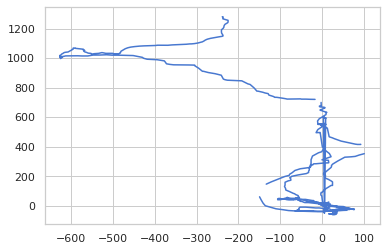

In [26]:
tr=7
plt.plot(x[tr],y[tr])

In [28]:
ta.trial_table.loc[7]

t0         5961
tD         7935
tE         8402
tE_1       8402
tE_2       8598
dur        2440
cue           R
dec           L
correct     0.0
long        NaN
goal        NaN
grw           0
sw            1
vsw           1
Name: 7, dtype: object

In [57]:
zrc.loc[103].session_unit_id

3

In [322]:
zrc[zrc.session==session].sort_values(z_vars[0]) [ id_vars + [z_vars[0]]] 

,unit_id,subject,session,session_unit_id,unit_type,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm
651,651,Ne,NE_T3g_052918,18,mua,-3.654309
652,652,Ne,NE_T3g_052918,19,mua,-3.044180
643,643,Ne,NE_T3g_052918,10,mua,-2.994962
645,645,Ne,NE_T3g_052918,12,mua,-2.988056
650,650,Ne,NE_T3g_052918,17,mua,-2.689931
653,653,Ne,NE_T3g_052918,20,mua,-2.628466
649,649,Ne,NE_T3g_052918,16,mua,-2.488952
646,646,Ne,NE_T3g_052918,13,mua,-2.379229
633,633,Ne,NE_T3g_052918,0,cell,-2.201377
647,647,Ne,NE_T3g_052918,14,mua,-1.970496


## Example unit

In [333]:
zone_rates = ta.get_avg_trial_zone_rates()
fr_maps_trials = ta.get_trial_rate_maps(occ_rate_mask=True)
bal_cond_bigseg_rates = session_info.get_bal_conds_seg_rates()

In [334]:
%%time
cond_pairs = ta.bal_cond_pairs
with Parallel(n_jobs=5) as parallel:
    boot_corrs = {}
    for cond_pair in cond_pairs:
        boot_corrs[cond_pair] = ta.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=cond_pair, parallel=parallel)

CPU times: user 13.6 s, sys: 770 ms, total: 14.4 s
Wall time: 27.2 s


In [58]:
%%time
boot_subseg_rates = ta.get_avg_seg_rates_boot(segment_type='subseg', n_boot=50)

CPU times: user 15 s, sys: 781 ms, total: 15.8 s
Wall time: 21.7 s


In [59]:
boot_subseg_rates

,boot,cond,unit,seg,m
0,0,CR_bo,0,H,12.699242
1,0,CR_bo,1,H,1.906427
2,0,CR_bo,2,H,1.889002
3,0,CR_bo,3,H,9.891488
4,0,CR_bo,4,H,2.922773
...,...,...,...,...,...
428995,49,Odd_bi,17,G4,4.280617
428996,49,Odd_bi,18,G4,4.123316
428997,49,Odd_bi,19,G4,4.542040
428998,49,Odd_bi,20,G4,5.002784


In [60]:
ta.bal_cond_sets

{'CR_bo': {'cond': 'CR',
  'sub_conds': ['Co', 'Inco'],
  'trial_seg': 'out',
  'cond_set': {'CR': ['Co', 'Inco']}},
 'CL_bo': {'cond': 'CL',
  'sub_conds': ['Co', 'Inco'],
  'trial_seg': 'out',
  'cond_set': {'CL': ['Co', 'Inco']}},
 'Co_bo': {'cond': 'Co',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Co': ['CL', 'CR']}},
 'Inco_bo': {'cond': 'Inco',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Inco': ['CL', 'CR']}},
 'Co_bi': {'cond': 'Co',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'in',
  'cond_set': {'Co': ['CL', 'CR']}},
 'Inco_bi': {'cond': 'Inco',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'in',
  'cond_set': {'Inco': ['CL', 'CR']}},
 'Even_bo': {'cond': 'Even',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Even': ['CL', 'CR']}},
 'Odd_bo': {'cond': 'Odd',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Odd': ['CL', 'CR']}},
 'Even_bi': {'cond': 'Even',
  'sub_conds': ['CL', 'CR'],
  'trial_se

In [66]:
def plot_trial_track_spikes(trial_analyses, unit=0, ax=None):
    
    lw = 0.1 # line width
    la = 0.3 # line alpha
    lc = '0.5' # line color
    
    ss = 1 # scatter scale
    sc = 'r' # scatter color 
    sa = 0.1 # scatter alpha
    
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure
        
    x,y = trial_analyses.get_trial_track_pos()
    invalid_samps = ta.pz_invalid_samps
    spk = trial_analyses.get_trial_neural_data(data_type='spikes')
    
    for tr in range(trial_analyses.n_trials):
        ax.plot(x[tr], y[tr], linewidth=lw, alpha=la, color=lc, zorder=-1)
        ax.scatter(x[tr], y[tr], s=spk[unit,tr]*ss, color=sc, alpha=sa, linewidth=0)

    ax.axis("square")
    ax.axis("off")
    ax.set_ylim(trial_analyses.y_edges[0], trial_analyses.y_edges[-1])
    ax.set_xlim(trial_analyses.x_edges[0], trial_analyses.x_edges[-1])
    
    return ax

def plot_trial_rate_map(trial_analyses, trials, unit=0, ax=None):
    cmap = 'viridis'
    
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure    
    
    ax = sns.heatmap(fr_maps_trials[unit], cbar=False, square=True, cmap=cmap, ax=ax)
    ax.invert_yaxis()
    ax.axis("off")
    
    data = fr_maps_trials[unit].flatten()
    data_colors, color_array = pf.get_colors_from_data(data, cmap=cmap)
    
    ax_p = ax.get_position()
    w, h = ax_p.width, ax_p.height
    x0,y0 = ax_p.x0, ax_p.y0

    cax_p = [x0+w*0.85, y0+h*0.05, w*0.05, h*0.15]
    cax = f.add_axes(cax_p)

    pf.get_color_bar_axis(cax, color_array, color_map=cmap, label='FR')

    return ax

def plot_zone_rates(zone_rates, ax=None, min_value=0, max_value=None, label='FR', color_map='viridis',legend=False, div=False, lw=0.2):
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure
    
    tmz.plot_zone_activity(zone_rates,  ax=ax, min_value=min_value, max_value=max_value, color_map=color_map, label=label, legend=legend, lw=lw)

In [67]:
dfm = boot_subseg_rates.groupby(['cond', 'unit', 'seg']).median()
dfm = dfm.reset_index()

In [68]:
def plot_trial_spks_trajectories(trials, unit, ax=None):
    maze_params = dict(fontsize=5, lw=0.2, line_color='0.6',sub_segs='all',  sub_seg_color='None', sub_seg_lw=0)
    trajectories_params = dict(lw= 0.2, alpha=0.1, color='0.3')
    spike_params = dict(color='r', alpha=0.1, linewidth=0 )
    spike_scale = 1

    x,y = ta.get_trial_track_pos()
    spk = ta.get_trial_neural_data(data_type='spikes')
    
    _ = tmz.plot_maze(axis=ax, seg_color=None, zone_labels=False, seg_alpha=0.1,  **maze_params)
    
    for tr in trials:
        dec = ta.trial_table.loc[tr, 'dec']
        valid_dur = ta.trial_table.loc[tr, 'dur'] <= 1000
        if (dec in ['L','R']) & valid_dur:
            ax.plot(x[tr], y[tr], zorder=9, **trajectories_params)
            #ax.scatter(x[tr], y[tr], s=spk[unit,tr]*spike_params['scale'], **spike_params)
            ax.scatter(x[tr], y[tr], s=spk[unit,tr]*spike_scale, zorder=10, **spike_params)


    ax.axis("square")
    ax.axis("off")
    #ax[ii].set_ylim(ta.y_edges[0], ta.y_edges[-1])
    ax.set_xlim(ta.x_edges[0]*1.24, ta.x_edges[-1]*1.24)

def plot_zr_conds(unit, axs, cond_pair='CR_bo-CL_bo'):
    
    conds = cond_pair.split('-')
    if cond_pair == 'CR_bo-CL_bo':
        conds = conds[::-1]
   
    max_val = dfm[(dfm.cond.isin(conds)) & (dfm.unit==unit)].m.max()
    
    for ii, cond in enumerate(conds):
        zr = dfm[(dfm.cond==cond) & (dfm.unit==unit)][['m','seg']]
        zr = zr.pivot_table(columns='seg', aggfunc= lambda x: x)
        zr = zr.reset_index().drop('index', axis=1)
        
        plot_zone_rates(zr.loc[0], ax=axs[ii], max_value=max_val, legend=ii%2, lw=0.1)

def plot_boot_corr_dist(unit, cond_pair,ax):
    sns.set_style(rc={"axes.edgecolor":'0.3',
                 'xtick.bottom': True,
                 'ytick.left': False})
    
    vline_lw=0.6
    kde_lw=0.8
    fontsize=6
    label_fontsize=7
    
    legend_params = dict(handlelength = 0.25, handletextpad=0.2, bbox_to_anchor=[-0.4,0.2], loc='lower left',
                     frameon=False, fontsize=4, markerscale=0.6, labelspacing=0.1)
    
    test_color = 'b'
    null_color = '0.5'
    
    null_pair = ta.test_null_bal_cond_pairs[cond_pair]

    test_boots = boot_corrs[cond_pair].loc[unit]
    null_boots = boot_corrs[null_pair].loc[unit]
    
    sns.kdeplot(data=test_boots, fill=False, color=test_color, linewidth=kde_lw, ax=ax, label=cond_pair)
    xt, yt = ax.lines[0].get_data()
    test_median_xloc = test_boots.median()
    test_median_yloc = yt[np.argmin(abs(xt-test_median_xloc))]
    ax.plot([test_median_xloc]*2, [0, test_median_yloc], color=test_color, linestyle=':', linewidth=vline_lw, zorder=-1)

    
    sns.kdeplot(data=null_boots, fill=False, color=null_color, linewidth=kde_lw, ax=ax, label=null_pair)
    xn, yn = ax.lines[2].get_data()
    null_median_xloc = null_boots.median()
    null_median_yloc = yn[np.argmin(abs(xn-null_median_xloc))]
    ax.plot([null_median_xloc]*2, [0, null_median_yloc], color=null_color, linestyle=':', linewidth=vline_lw, zorder=-1)
    
    ax.get_yaxis().set_ticks([])
    ax.tick_params(axis="both", direction="out", length=1, width=0.5, color='0.2',  which='major', pad=0.5)
    ax.grid(False)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([0,1], fontsize=fontsize-2)
    ax.set_xlabel(r"$\tau$", fontsize=fontsize, labelpad=-1)
    
    sns.despine(ax=ax, left = True)
    ax.spines['bottom'].set_linewidth(0.5)
    
    ax.set_ylabel('')
    legend_elements = [plt.Line2D([0],[0], color=test_color,label='CR_CL', lw=kde_lw),
                       plt.Line2D([0],[0], color=null_color,label="Even_Odd", lw=kde_lw),
                      ]
    ax.legend(handles=legend_elements, **legend_params)


NameError: name 'boot_corrs' is not defined

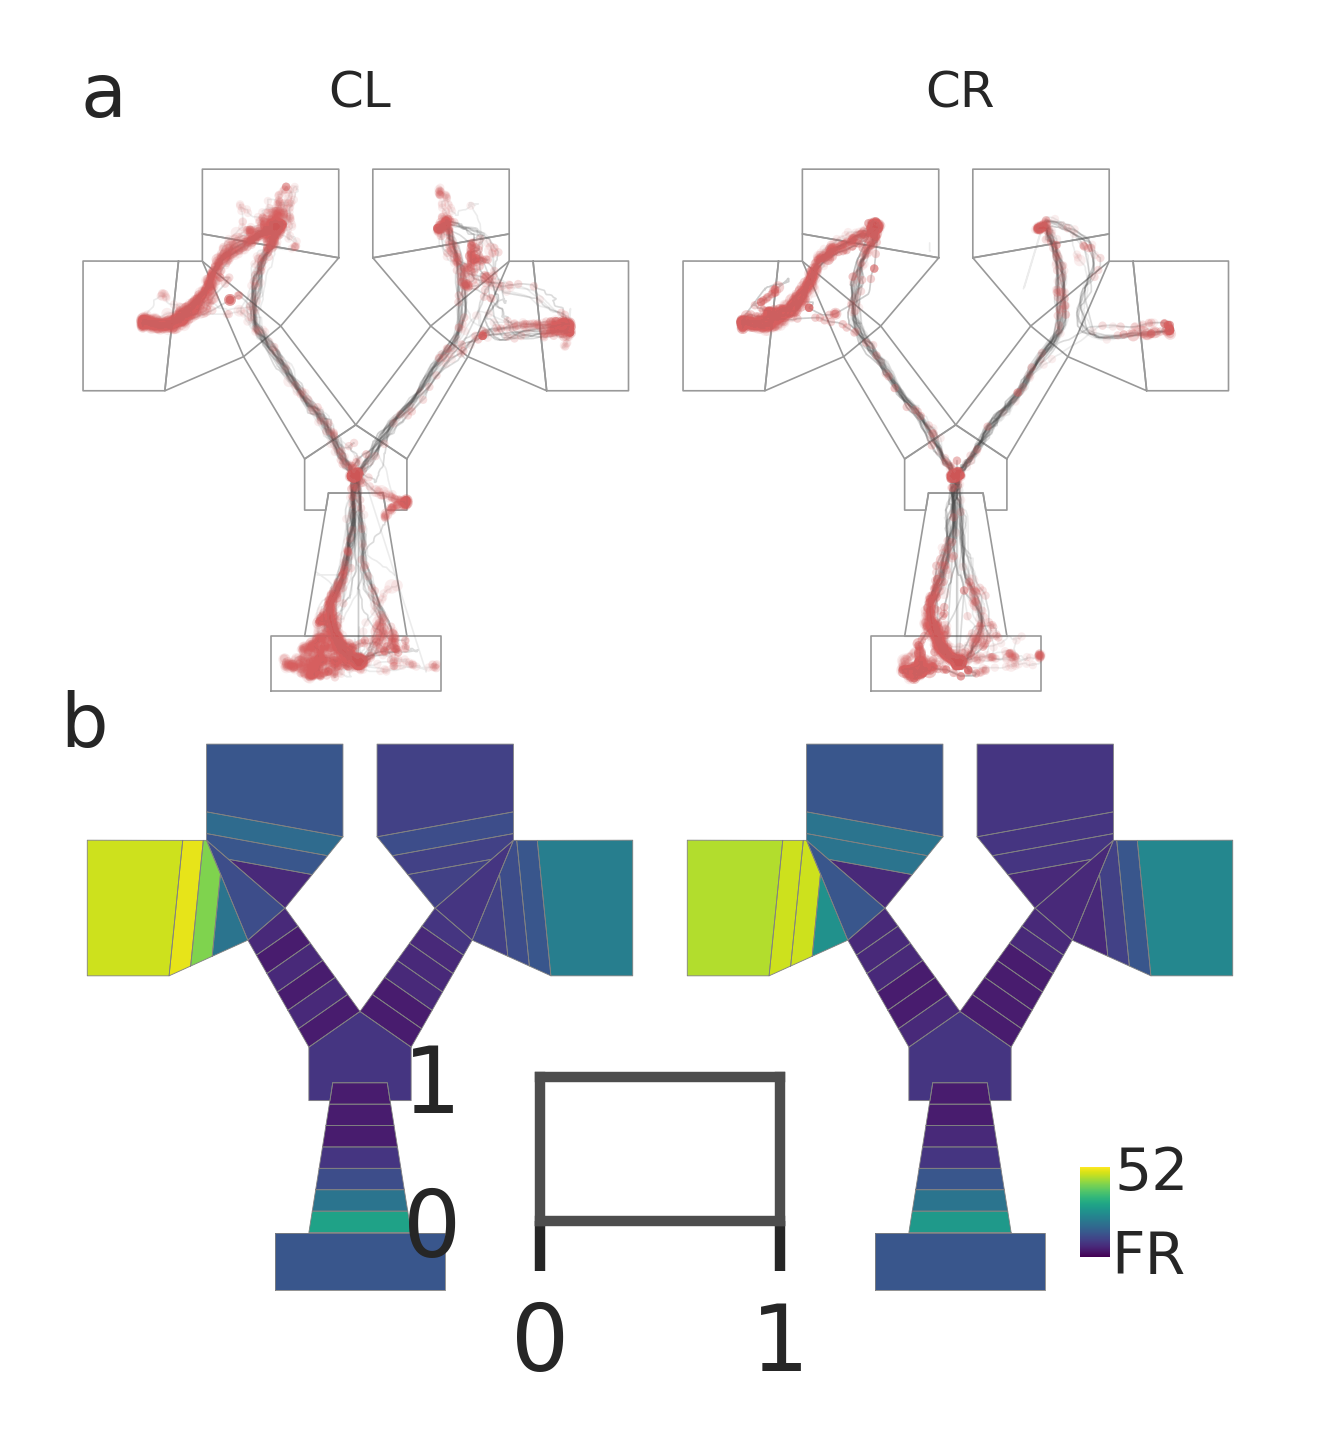

In [80]:
cond_pair = 'CR_bo-CL_bo'

cue_trial_sets = ta.get_trials_boot_cond_set({'CL':['Co','Inco'], 'CR':['Co','Inco']})
boot_num = 3
unit = 0

f,ax=plt.subplots(2,2,figsize=(2,2),dpi=600)
ax = ax.flatten()
ax[0].set_position([0, 0.5 ,0.5 ,0.5])
ax[1].set_position([0.5, 0.5, 0.5, 0.5])
ax[2].set_position([0, 0 ,0.5 ,0.5])
ax[3].set_position([0.5, 0, 0.5, 0.5])
ax_insert = f.add_axes([0.4,0.08,0.2,0.12])


trials = cue_trial_sets['CL'][:, boot_num]
plot_trial_spks_trajectories(trials, unit, ax=ax[0])
ax[0].set_title('CL', fontsize=6, pad=1)
ax[0].text(0,1,'a', fontsize=9, transform=ax[0].transAxes)

trials = cue_trial_sets['CR'][:, boot_num]
plot_trial_spks_trajectories(trials, unit, ax=ax[1])
ax[1].set_title('CR', fontsize=6,pad=1)

plot_zr_conds(unit, axs=ax[2:])
ax[2].text(0,0.95,'b', fontsize=9, transform=ax[2].transAxes)


plot_boot_corr_dist(unit,cond_pair,ax_insert)

z_val = zrc[(zrc.session==session)&(zrc.session_unit_id==unit)][z_vars[0]].values[0]
ax_insert.text(-0.3,0.1, r"$\bar{z}_{\Delta \tau}$="+str(np.around(z_val,1)), fontsize=5, transform=ax_insert.transAxes)


In [84]:
zr = dfm[(dfm.cond==cond_pair.split('-')[0]) & (dfm.unit==0)][['m','seg']]
zr = zr.pivot_table(columns='seg', aggfunc= lambda x: x)
zr = zr.reset_index().drop('index', axis=1)
zr

seg,D,G1,G2,G3,G4,H,a_0,a_1,a_2,a_3,...,e_4,e_5,f_0,f_1,f_2,g_0,g_1,g_2,i1,i2
0,5.69898,23.164787,5.43326,11.749337,48.148397,13.087284,28.847201,20.173218,12.909767,6.296361,...,3.802839,3.581878,2.901437,18.765378,20.147891,25.190445,51.425172,51.828542,3.522646,13.451935


In [127]:
%%time 
n_boot=25
unit_id=0
bal_conds = ta.bal_cond_pairs[0].split('-')
trial_sets = {}
trial_segs = {}
for bal_cond in bal_conds:
    bal_cond_set = ta.bal_cond_sets[bal_cond]

    cond = bal_cond_set['cond']
    sub_conds = bal_cond_set['sub_conds']
    cond_set = {cond: sub_conds}
    trial_segs[bal_cond] = bal_cond_set['trial_seg']
    trial_sets[bal_cond] = ta.get_trials_boot_cond_set(cond_set, n_boot=n_boot)

unit_trial_zone_rates1 = ta.trial_zones_rates[trial_segs[bal_conds[0]]][unit_id]
unit_trial_zone_rates2 = ta.trial_zones_rates[trial_segs[bal_conds[0]]][unit_id]
zr1 = pd.DataFrame(index=range(n_boot), columns=ta.tmz.all_segs_names)
zr2 = pd.DataFrame(index=range(n_boot), columns=ta.tmz.all_segs_names)
for boot in range(n_boot):
    zr1.loc[boot] = unit_trial_zone_rates1.loc[trial_sets[bal_conds[0]][:, boot]].mean()
    zr2.loc[boot] = unit_trial_zone_rates2.loc[trial_sets[bal_conds[1]][:, boot]].mean()
    
zr1.replace([np.inf, -np.inf], np.nan, inplace=True)
zr2.replace([np.inf, -np.inf], np.nan, inplace=True)


CPU times: user 57.5 ms, sys: 4.03 ms, total: 61.6 ms
Wall time: 60 ms


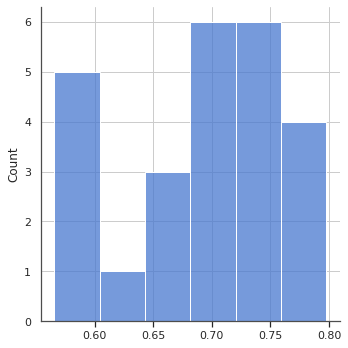

In [133]:
sns.displot(zr1.corrwith(zr2,axis=1, method='kendall'))

In [131]:
%%time
out = np.zeros(n_boot**2)
cnt = 0
for ii in range(n_boot):
    for jj in range(n_boot):
        out[cnt] = rs.kendall(zr1.loc[ii], zr2.loc[jj]) 
        cnt+=1
out

CPU times: user 1.04 s, sys: 1.28 ms, total: 1.04 s
Wall time: 1.03 s


array([0.79757085, 0.73819163, 0.77867746, 0.62483131, 0.73009447,
       0.6977058 , 0.78407557, 0.62483131, 0.73009447, 0.68960864,
       0.6977058 , 0.7462888 , 0.77597841, 0.70580297, 0.73549258,
       0.74089069, 0.73819163, 0.66145092, 0.65182186, 0.70040486,
       0.74898785, 0.7219973 , 0.73819163, 0.78378378, 0.82186235,
       0.80026991, 0.7462888 , 0.74898785, 0.60593792, 0.70040486,
       0.66801619, 0.7705803 , 0.63292848, 0.7705803 , 0.68151147,
       0.70040486, 0.73279352, 0.74089069, 0.68151147, 0.71659919,
       0.74358974, 0.72469636, 0.65576102, 0.6437247 , 0.69230769,
       0.71929825, 0.73549258, 0.7462888 , 0.78378378, 0.80296896,
       0.78677463, 0.73819163, 0.75708502, 0.63022942, 0.70850202,
       0.65452092, 0.78407557, 0.61403509, 0.71929825, 0.66261808,
       0.72469636, 0.71390013, 0.73819163, 0.6734143 , 0.70850202,
       0.72469636, 0.7219973 , 0.66145092, 0.64102564, 0.68960864,
       0.73279352, 0.74358974, 0.70580297, 0.74964438, 0.81106

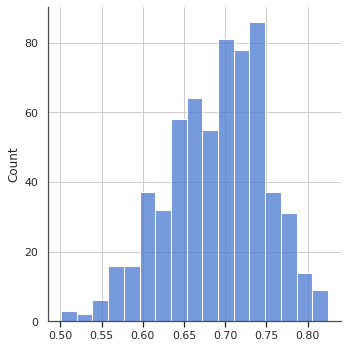

In [132]:
sns.displot(out)

ValueError: RGBA sequence should have length 3 or 4

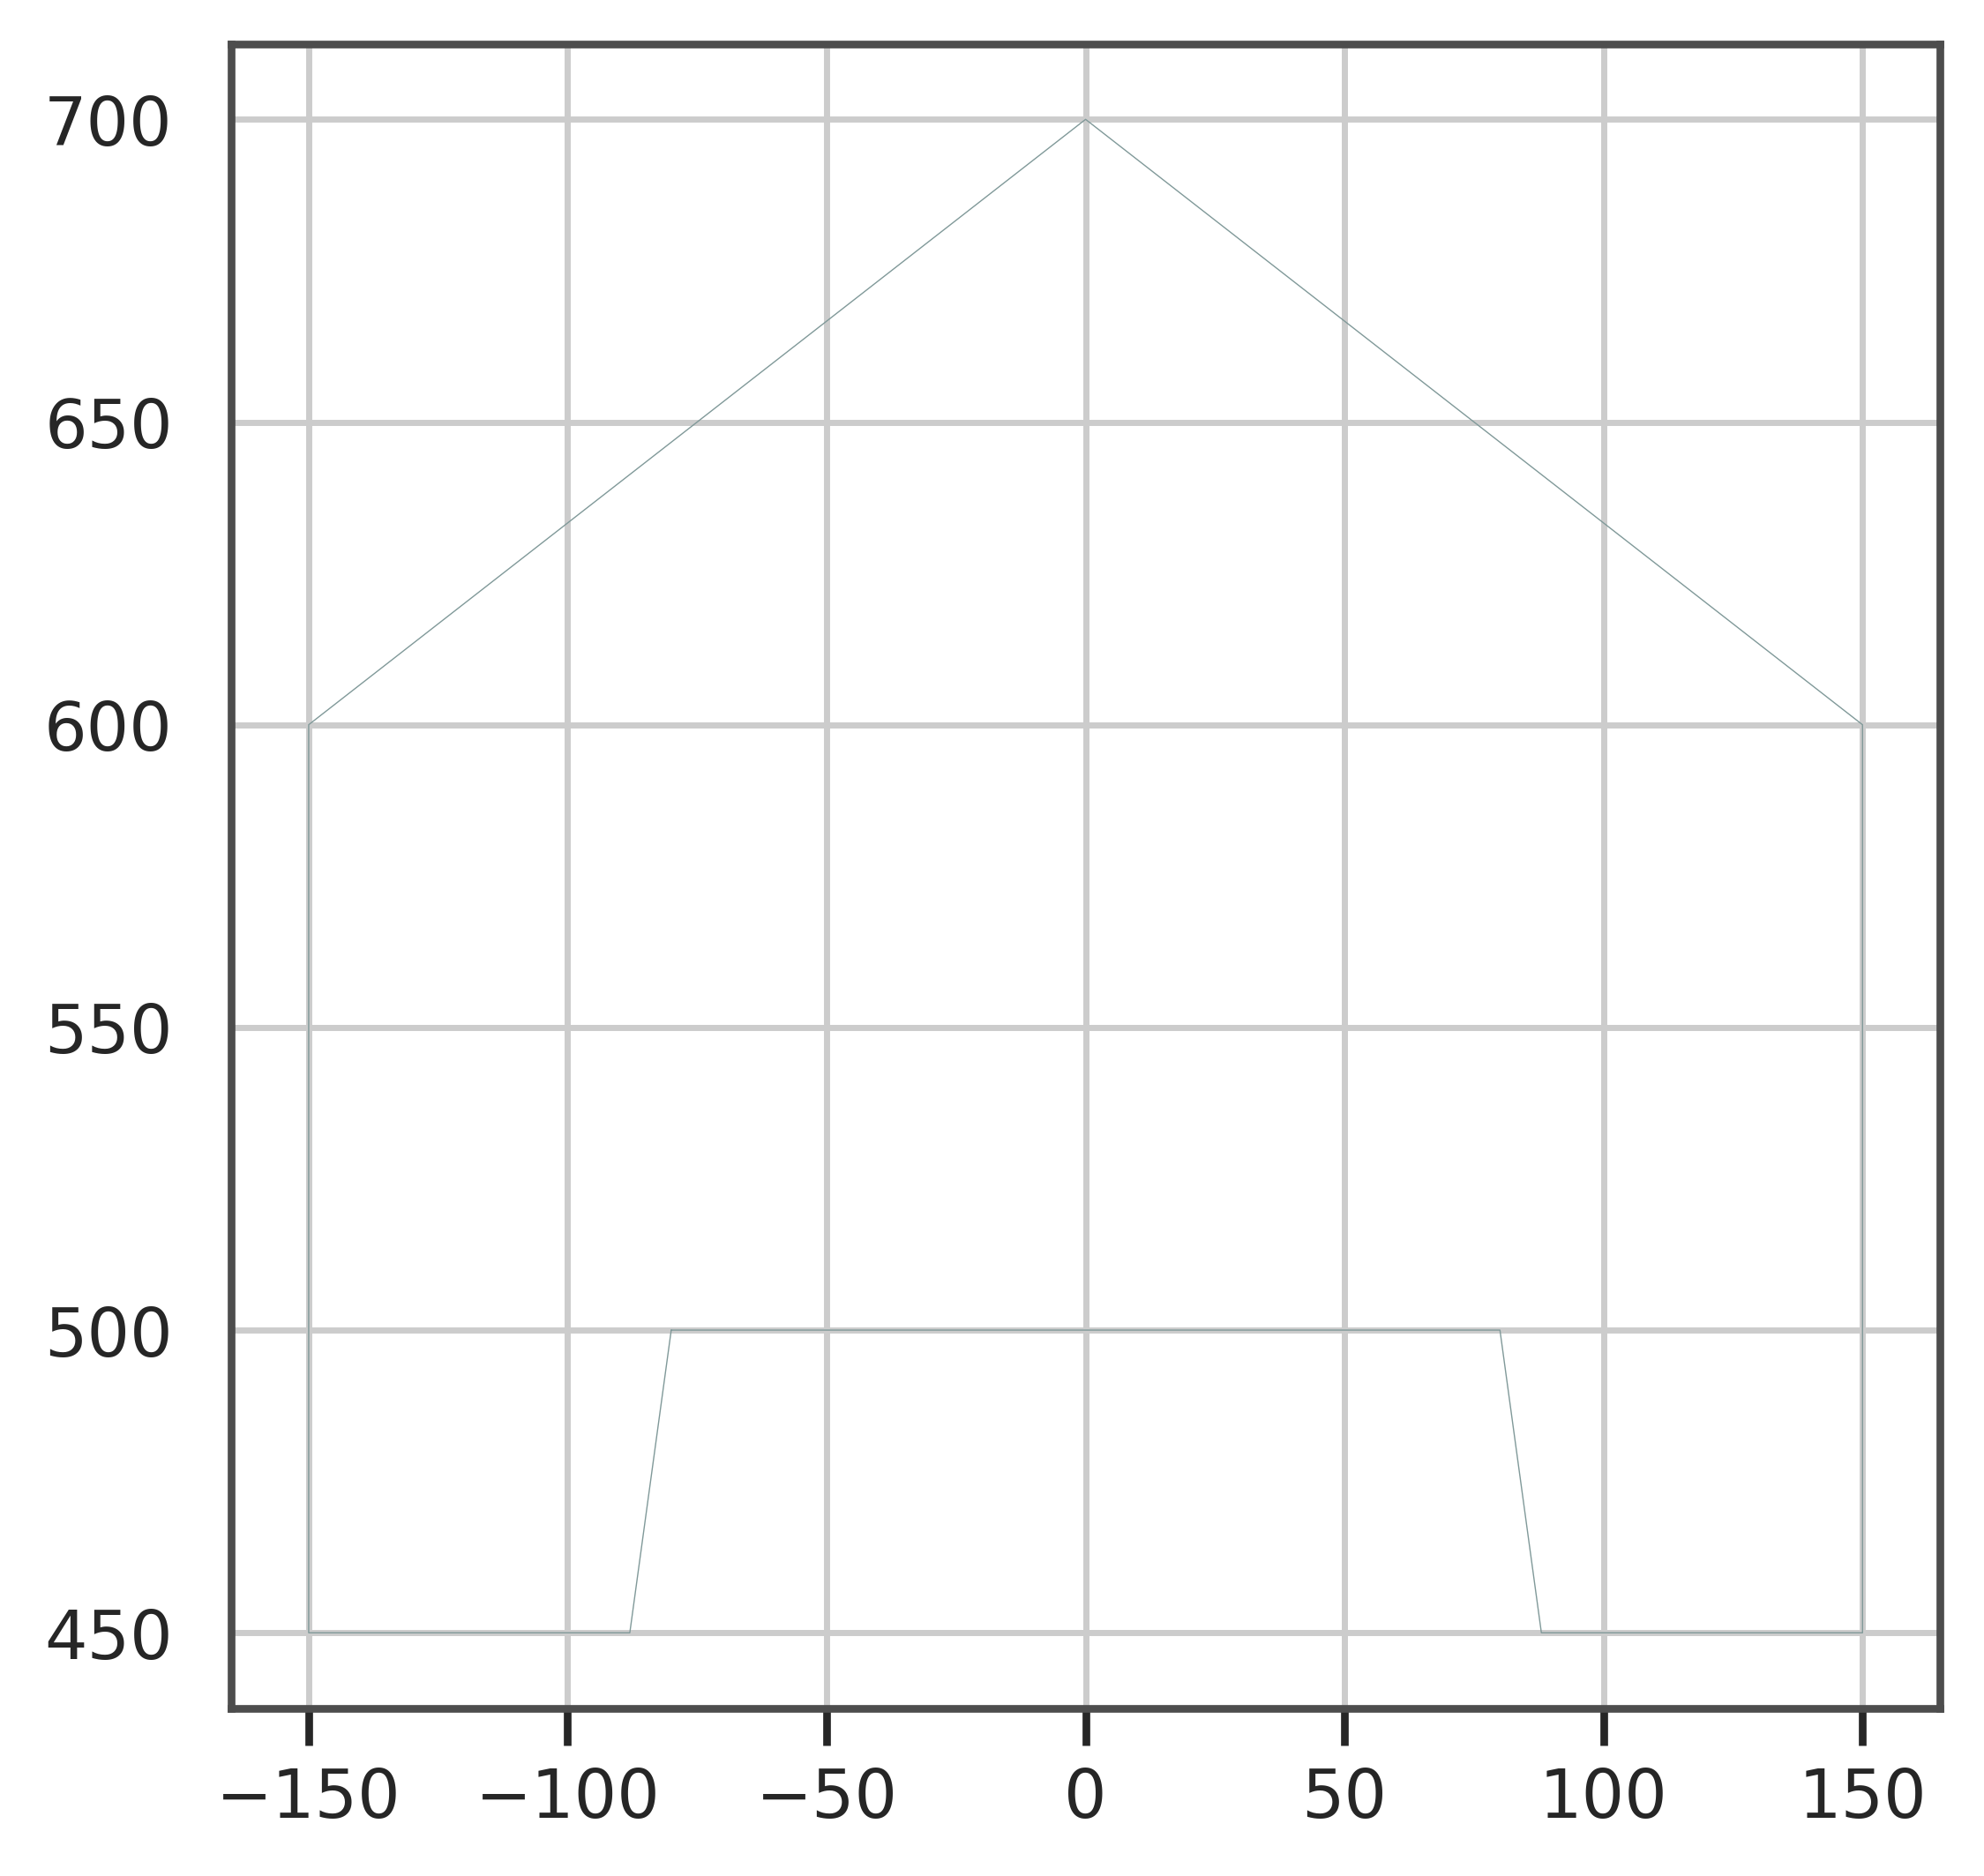

In [92]:
tmz.plot_zone_activity(zr, line_color=[0.5,0.6,0.6], color=[0.6.])

In [97]:
for k,v in zr.items():
    print(k,v.values)

D [5.69898047]
G1 [23.16478725]
G2 [5.43326034]
G3 [11.74933685]
G4 [48.14839695]
H [13.08728399]
a_0 [28.84720074]
a_1 [20.17321764]
a_2 [12.90976674]
a_3 [6.29636143]
a_4 [2.91851787]
a_5 [1.57486145]
a_6 [2.08989692]
b_0 [1.7579261]
b_1 [1.31297963]
b_2 [1.50452679]
b_3 [2.2673617]
b_4 [2.37267052]
b_5 [2.4068719]
c_0 [3.66699177]
c_1 [7.43159189]
c_2 [13.01485557]
d_0 [3.59747186]
d_1 [4.79143381]
d_2 [4.63251001]
e_0 [3.07660096]
e_1 [1.80374735]
e_2 [1.57275017]
e_3 [3.17537427]
e_4 [3.80283925]
e_5 [3.58187814]
f_0 [2.90143709]
f_1 [18.76537797]
f_2 [20.14789082]
g_0 [25.19044485]
g_1 [51.42517228]
g_2 [51.82854204]
i1 [3.52264629]
i2 [13.45193475]


In [77]:
boot_subseg_rates.loc[(boot_subseg_rates.unit==0) & (n)].reset_index(drop=True)

,boot,cond,unit,seg,m
0,0,CR_bo,0,H,12.699242
1,0,CR_bo,0,a_0,27.719215
2,0,CR_bo,0,a_1,18.226408
3,0,CR_bo,0,a_2,11.870722
4,0,CR_bo,0,a_3,5.300785
...,...,...,...,...,...
19495,49,Odd_bi,0,G3,14.642683
19496,49,Odd_bi,0,g_0,0.578299
19497,49,Odd_bi,0,g_1,2.115020
19498,49,Odd_bi,0,g_2,6.573942


In [79]:
ta.bal_cond_pairs

['CR_bo-CL_bo',
 'Co_bo-Inco_bo',
 'Co_bi-Inco_bi',
 'Even_bo-Odd_bo',
 'Even_bi-Odd_bi']

In [350]:
f.savefig(info.paths['figures'] / f"example_cue_remap_{session}_{unit}.png", dpi=600, bbox_inches='tight')

In [50]:
cond_sets = {}
cond_sets.update(ta.bal_cond_sets['CL_bo']['cond_set'])
cond_sets.update(ta.bal_cond_sets['CR_bo']['cond_set'])
cond_sets
ta.bal_cond_pairs[]

['CR_bo-CL_bo',
 'Co_bo-Inco_bo',
 'Co_bi-Inco_bi',
 'Even_bo-Odd_bo',
 'Even_bi-Odd_bi']

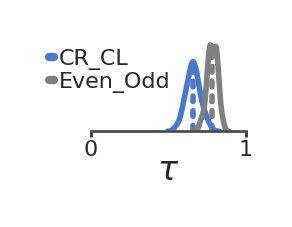

In [255]:
def plot_boot_corr_dist(unit, cond_pair,ax):
    sns.set_style(rc={"axes.edgecolor":'0.3',
                 'xtick.bottom': True,
                 'ytick.left': False})
    
    vline_lw=1
    kde_lw=1
    fontsize=6
    label_fontsize=7
    
    legend_params = dict(handlelength = 0.25, handletextpad=0.2, bbox_to_anchor=[-0.4,0.2], loc='lower left',
                     frameon=False, fontsize=4, markerscale=0.6, labelspacing=0.1)
    
    test_color = 'b'
    null_color = '0.5'
    
    null_pair = ta.test_null_bal_cond_pairs[cond_pair]

    test_boots = boot_corrs[cond_pair].loc[unit]
    null_boots = boot_corrs[null_pair].loc[unit]
    
    sns.kdeplot(data=test_boots, fill=False, color=test_color, linewidth=kde_lw, ax=ax, label=cond_pair)
    xt, yt = ax.lines[0].get_data()
    test_median_xloc = test_boots.median()
    test_median_yloc = yt[np.argmin(abs(xt-test_median_xloc))]
    ax.plot([test_median_xloc]*2, [0, test_median_yloc], color=test_color, linestyle=':', linewidth=vline_lw, zorder=-1)

    
    sns.kdeplot(data=null_boots, fill=False, color=null_color, linewidth=kde_lw, ax=ax, label=null_pair)
    xn, yn = ax.lines[2].get_data()
    null_median_xloc = null_boots.median()
    null_median_yloc = yn[np.argmin(abs(xn-null_median_xloc))]
    ax.plot([null_median_xloc]*2, [0, null_median_yloc], color=null_color, linestyle=':', linewidth=vline_lw, zorder=-1)
    
    ax.get_yaxis().set_ticks([])
    ax.tick_params(axis="both", direction="out", length=1, width=0.5, color='0.2',  which='major', pad=0.5)
    ax.grid(False)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([0,1], fontsize=fontsize-2)
    ax.set_xlabel(r"$\tau$", fontsize=fontsize, labelpad=-1)
    
    sns.despine(ax=ax, left = True)
    ax.spines['bottom'].set_linewidth(0.5)
    
    ax.set_ylabel('')
    legend_elements = [plt.Line2D([0],[0], color=test_color,label='CR_CL'),
                       plt.Line2D([0],[0], color=null_color,label="Even_Odd"),
                      ]
    ax.legend(handles=legend_elements, **legend_params)

f,ax=plt.subplots(figsize=(0.5,0.3),dpi=400)
plot_boot_corr_dist(4,cond_pair,ax)

In [54]:
#'b.'.join( ['i','ii','iii', 'iv'])
sub_panels = ['b.' + _ for _ in ['i','ii','iii', 'iv']]
sub_panels

['b.i', 'b.ii', 'b.iii', 'b.iv']